# <center>Projeto de Análise Exploratória Willians M. Primo</center>
Análise da base de dados <b>flight-delays/flights<b> para avaliar o que influencia os cancelamentos e atrasos nos voos.

### Importando bibliotecas para processamento e análise dos dados

In [50]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

### Baixando base de dados flight-delays

In [51]:
base_de_dados_flights = pd.read_csv('../input/flight-delays/flights.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
# Para facilitar a análise foram utilizadas apenas SCHEDULED_ARRIVAL amostras
base_resumida = base_de_dados_flights[0:100000]
base_resumida

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015,1,7,3,EV,4992,N837AS,ATL,BQK,1108,...,1208.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99996,2015,1,7,3,NK,394,N522NK,LAS,PHL,1108,...,1844.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99997,2015,1,7,3,OO,5606,N582SW,SFO,BFL,1108,...,1232.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
99998,2015,1,7,3,UA,1135,N38473,ORD,MCO,1109,...,1453.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#Colunas Originais, antes do tratamento
base_resumida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

### Justificativa da primeira remoção
Essa primeria remoção de colunas se justifica pelo fato de que elas não trazem informação util, são apenas variáveis de controle

In [54]:
### Remoção de colunas desnecessárias
base_resumida = base_resumida.drop(['FLIGHT_NUMBER', 'TAIL_NUMBER', 'YEAR', 'DAY', 'TAXI_OUT', 'DIVERTED'], axis=1)

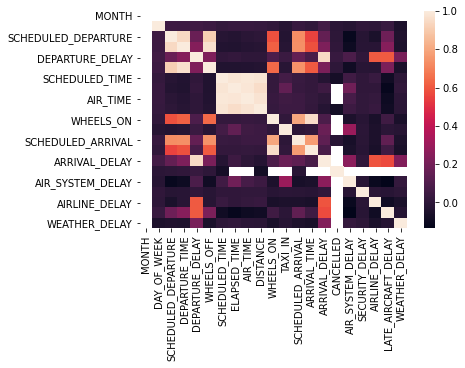

In [55]:
### Matriz de correlação das features, após primeira remoção de colunas
correlacoes = base_resumida.corr(method='pearson')
sb.heatmap(correlacoes)

### Justificativa da segunda remoção de colunas
Como podemos observar na matriz de correlação, muitas algumas variáveis apresentam correlação muito forte e motivo é que algumas delas trazem informações sobre o mesmo acontecimento, como é o caso das colunas: <b>ARRIVAL_TIME, DEPARTURE_DELAY, AIRLINE_DELAY</b> entre outras que trazem informações sobre os atrazos ocorridos. Como são informações futuras, não teremos acesso a essas informações para realizar a previsão de atrasos, por exemplo. Então, com relaçõa a essas colunas, foi mantida apenas a coluna "DEPARTURE_DELAY".

Outras, como <b>DEPARTURE_TIME</b>, quando relacionada com <b>SCHEDULED_DEPARTURE</b> pode ser utilizada para obter o tempo de atraso, isso poderia levar o modelo de previsão a uma alta taxa de acerto nos testes, mas como sendo uma informação que não teriamos para realizar uma previsão real os testes não seriam fidedignos.

Já no caso da coluna <b>CANCELLED</b> tem forte relação com o tempo de atraso, então será removida quando no monento de treino e teste do modelo (manteremos,por enquanto, para algumas outras análises).

In [56]:
### Remoção de colunas desnecessárias
base_resumida = base_resumida.drop(['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'ARRIVAL_TIME', 'DEPARTURE_TIME', 'ELAPSED_TIME', 'TAXI_IN', 'AIR_TIME', 'ARRIVAL_DELAY'], axis=1)
base_resumida

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,CANCELLED
0,1,4,AS,ANC,SEA,5,-11.0,15.0,205.0,1448,404.0,430,0
1,1,4,AA,LAX,PBI,10,-8.0,14.0,280.0,2330,737.0,750,0
2,1,4,US,SFO,CLT,20,-2.0,34.0,286.0,2296,800.0,806,0
3,1,4,AA,LAX,MIA,20,-5.0,30.0,285.0,2342,748.0,805,0
4,1,4,AS,SEA,ANC,25,-1.0,35.0,235.0,1448,254.0,320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,3,EV,ATL,BQK,1108,-6.0,1125.0,71.0,238,1205.0,1219,0
99996,1,3,NK,LAS,PHL,1108,9.0,1128.0,274.0,2176,1836.0,1842,0
99997,1,3,OO,SFO,BFL,1108,-7.0,1129.0,77.0,238,1228.0,1225,0
99998,1,3,UA,ORD,MCO,1109,7.0,1142.0,165.0,1005,1445.0,1454,0


In [57]:
### Base após limpeza
base_resumida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                100000 non-null  int64  
 1   DAY_OF_WEEK          100000 non-null  int64  
 2   AIRLINE              100000 non-null  object 
 3   ORIGIN_AIRPORT       100000 non-null  object 
 4   DESTINATION_AIRPORT  100000 non-null  object 
 5   SCHEDULED_DEPARTURE  100000 non-null  int64  
 6   DEPARTURE_DELAY      97702 non-null   float64
 7   WHEELS_OFF           97629 non-null   float64
 8   SCHEDULED_TIME       100000 non-null  float64
 9   DISTANCE             100000 non-null  int64  
 10  WHEELS_ON            97560 non-null   float64
 11  SCHEDULED_ARRIVAL    100000 non-null  int64  
 12  CANCELLED            100000 non-null  int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 9.9+ MB


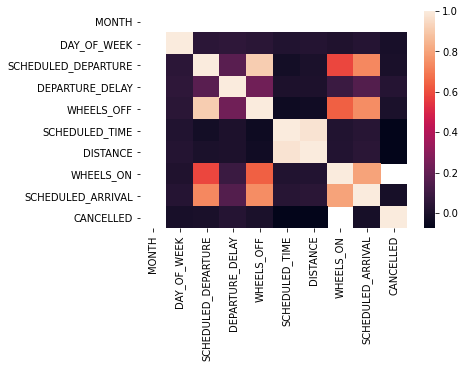

In [58]:
### Matriz de correlação das features
correlacoes = base_resumida.corr(method='pearson')
sb.heatmap(correlacoes)

Após a remoção das colunas listadas anteriormente, podemos notar que a matriz apresenta uma quantidade bem menor de correlações (com relação causa efeito).

In [59]:
# Qual a quantidade de voos cancelados?
numero_cancelamentos = base_resumida.value_counts('CANCELLED')
numero_cancelamentos

CANCELLED
0    97611
1     2389
dtype: int64

### Ajustes na base de dados para análise
Para conseguir avaliar o impacto das colunas <b>DAY_OF_WEEK</b> e <b>ORIGIN_AIRPORT</b> foi preciso fazer uma sumarização com base nessas características.

In [60]:
def ordenarIndices(indices, valores):
    for i in range(0, len(indices)):
        idx = i
        for j in range(i + 1, len(indices)):
            idx = j if valores[j] < valores[idx] else idx
        valores[i], valores[idx] = valores[idx], valores[i]
        indices[i], indices[idx] = indices[idx], indices[i]

In [61]:
### Criando uma separação da quantidade de Cancelamentos por Dias da semana
size = len(base_resumida['DAY_OF_WEEK'].unique())
dias = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]
dia_x_cancelamento = [0] * size
dia_x_atrasos = [0] * size
total_voos_dia = [0] * size
for (dia_semana, canceled, delay) in zip(base_resumida['DAY_OF_WEEK'], base_resumida['CANCELLED'], base_resumida['DEPARTURE_DELAY']):
    total_voos_dia[dia_semana-1] += 1
    dia_x_cancelamento[dia_semana-1] += canceled
    dia_x_atrasos[dia_semana-1] += (1 if delay > 15 else 0)

for idx in range(len(dias)):
    dia_x_cancelamento[idx] /= total_voos_dia[idx]
plt.xlabel("Dias da semana")
plt.ylabel("Quantidade de voos cancelados")
plt.bar(dias, dia_x_cancelamento)

<BarContainer object of 7 artists>

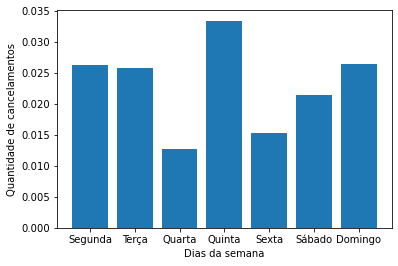

In [62]:
for idx in range(len(dias)):
    dia_x_cancelamento[idx] /= total_voos_dia[idx]
plt.xlabel("Dias da semana")
plt.ylabel("Quantidade de cancelamentos")
plt.bar(dias, dia_x_cancelamento)

Analisando a relação do dia da semana com quantidade de cancelamentos, podemos perceber que o impacto é mínimao.

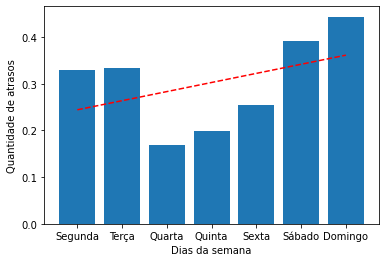

In [63]:
for idx in range(len(dias)):
    dia_x_atrasos[idx] /= total_voos_dia[idx]
plt.xlabel("Dias da semana")
plt.ylabel("Quantidade de atrasos")
plt.bar(dias, dia_x_atrasos)

#Linha de tendência
indicesDias = range(len(dias))
z = np.polyfit(indicesDias, dia_x_atrasos, 1)
p = np.poly1d(z)
plt.plot(indicesDias,p(indicesDias),"r--")

A mesma análise do dia da semana na quantidade de atrasos mostrou que dependendo do dia da semana a quantidade de atrasos muda significativamente. Pprincipalmente nos fins de semana percebe-se que a quantidade de atrasos é bem maior se comparado com os demais dias.

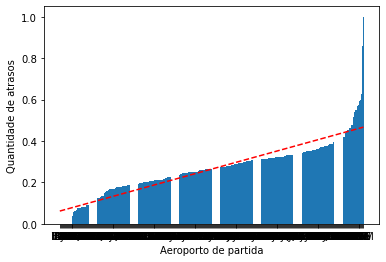

In [64]:
### Criando uma separação da quantidade de atrasos
origens = base_resumida['ORIGIN_AIRPORT'].unique()
origen_numerica = [0] * len(origens)
total_voos_origem = [0] * len(origens)
for (delay, origem) in zip(base_resumida['DEPARTURE_DELAY'], base_resumida['ORIGIN_AIRPORT']):
    idx_origem = int(np.where(origens == origem)[0])
    total_voos_origem[idx_origem] += 1
    origen_numerica[idx_origem] += (1 if delay > 15 else 0)
    
for idx in range(len(origens)):
    origen_numerica[idx] /= total_voos_origem[idx]
ordenarIndices(origens, origen_numerica)
plt.xlabel("Aeroporto de partida")
plt.ylabel("Quantidade de atrasos")
plt.bar(origens, origen_numerica)

#Linha de tendência
indicesOrigens = range(len(origens))
z = np.polyfit(indicesOrigens, origen_numerica, 1)
p = np.poly1d(z)
plt.plot(indicesOrigens,p(indicesOrigens),"r--")

Foi feita uma análise com base no aeroporto de partida e podemos perceber que essa é uma variável que também apresenta impacto no número de atrasos, mas bem pequeno.

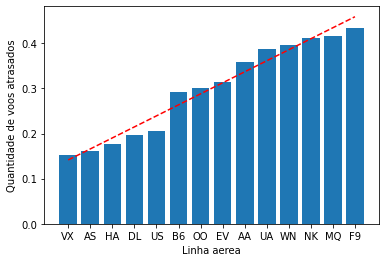

In [65]:
### Criando uma separação da quantidade de atrasos com relação a linha aerea.
linhas = base_resumida['AIRLINE'].unique()
linha_numerica = [0] * len(linhas)
total_voos_linha = [0] * len(linhas)
for (delay, linha) in zip(base_resumida['DEPARTURE_DELAY'], base_resumida['AIRLINE']):
    idx_linha = int(np.where(linhas == linha)[0])
    total_voos_linha[idx_linha] += 1
    linha_numerica[idx_linha] += (1 if delay > 15 else 0)
    
for idx in range(len(linhas)):
    linha_numerica[idx] /= total_voos_linha[idx]
ordenarIndices(linhas, linha_numerica)
plt.xlabel("Linha aerea")
plt.ylabel("Quantidade de voos atrasados")
plt.bar(linhas, linha_numerica)

#Linha de tendência
indicesLinhas = range(len(linhas))
z = np.polyfit(indicesLinhas, linha_numerica, 1)
p = np.poly1d(z)
plt.plot(indicesLinhas,p(indicesLinhas),"r--")

Outra caracteristica analisada foi a linha aerea <b>AIRLINE</b>. Também pode-se perceber que conforme a linha area o número de atrasos sofre um impacto significativo.

In [66]:
#Normalização e ajustes nos dados
coluna_resultado = []
for delay in base_resumida['DEPARTURE_DELAY']:
    if delay > 15:
        coluna_resultado.append(1)
    else:
        coluna_resultado.append(0)
        
base_resumida_ajustada = base_resumida.drop(['DEPARTURE_DELAY'], axis=1) #Remover essa coluna, pois ela é o indicador de atraso
base_resumida_ajustada['coluna_resultado'] = coluna_resultado
colunas_nao_numericas = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
labelEncoder = LabelEncoder()
for c in colunas_nao_numericas:
    base_resumida_ajustada[c] = labelEncoder.fit_transform(base_resumida_ajustada[c])

# Subistituindo valores Nan por zeros
base_resumida_ajustada=base_resumida_ajustada.fillna(0.001)
base_resumida_ajustada

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,CANCELLED,coluna_resultado
0,1,4,1,15,268,5,15.0,205.0,1448,404.0,430,0,0
1,1,4,0,168,226,10,14.0,280.0,2330,737.0,750,0,0
2,1,4,11,269,62,20,34.0,286.0,2296,800.0,806,0,0
3,1,4,0,168,195,20,30.0,285.0,2342,748.0,805,0,0
4,1,4,1,268,15,25,35.0,235.0,1448,254.0,320,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,3,4,18,37,1108,1125.0,71.0,238,1205.0,1219,0,0
99996,1,3,8,166,229,1108,1128.0,274.0,2176,1836.0,1842,0,0
99997,1,3,9,269,26,1108,1129.0,77.0,238,1228.0,1225,0,0
99998,1,3,10,219,185,1109,1142.0,165.0,1005,1445.0,1454,0,0


### Aplicando Arvore de descisão para previsão de atrasos nos voos
Para validar se a escolha das colunas foi realizada corretamente, foram realizados testes de predição com uma Arvore de decisão.

In [67]:
dados = base_resumida_ajustada.values
X, y = dados[:,:-1], dados[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#scaled_features = StandardScaler().fit_transform(X_train, X_test)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

predicao_testes = clf.predict_proba(X_test)
resultado = roc_auc_score(y_test, predicao_testes[:,1])
resultado

0.8678430240043338

### Redes Neurais
Também foi construída uma pequena rede neural para validar os resultados obtidos pela Arvore de decisão, como podemos verificar os resultado de classificação também foi na faixa de 80%, apesar de ficar um pouco abaixo do modelo anterior.

In [68]:
### Predição usando Redes Neurais
dados = base_resumida_ajustada.values
X, y = dados[:,:-1], dados[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#scaled_features = StandardScaler().fit_transform(X_train, X_test)
rede = tf.keras.Sequential()
rede.add(tf.keras.layers.Dense(units=128, input_shape=(X_train.shape[1],), activation='tanh'))
rede.add(tf.keras.layers.Dropout(.2))
rede.add(tf.keras.layers.Dense(units=2, activation='softmax'))
rede.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

rede.fit(X_train, y_train, epochs=10)
rede.evaluate(X_test,  y_test, verbose=2)

Epoch 1/10
2188/2188 [==============================] - 3s 1ms/step - loss: 0.6127 - accuracy: 0.6864
Epoch 2/10
2188/2188 [==============================] - 3s 1ms/step - loss: 0.5812 - accuracy: 0.7042
Epoch 3/10
2188/2188 [==============================] - 3s 1ms/step - loss: 0.5168 - accuracy: 0.7564
Epoch 4/10
2188/2188 [==============================] - 3s 1ms/step - loss: 0.4676 - accuracy: 0.7922
Epoch 5/10
2188/2188 [==============================] - 3s 1ms/step - loss: 0.4498 - accuracy: 0.8033
Epoch 6/10
2188/2188 [==============================] - 3s 1ms/step - loss: 0.4397 - accuracy: 0.8104
Epoch 7/10
2188/2188 [==============================] - 3s 1ms/step - loss: 0.4396 - accuracy: 0.8116
Epoch 8/10
2188/2188 [==============================] - 3s 1ms/step - loss: 0.4368 - accuracy: 0.8133
Epoch 9/10
2188/2188 [==============================] - 3s 1ms/step - loss: 0.4374 - accuracy: 0.8126
Epoch 10/10
2188/2188 [==============================] - 3s 1ms/step - loss: 0.434

[0.3415602147579193, 0.8859333395957947]